In [1]:
# 绘图模块
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
def predict(x, w, b):
        return np.dot(clf.coef_, x) + clf.intercept_
def plot_decsion_plane(x, w, b):
    # 画决策面
    colors = ['red', 'blue']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
    Z = predict(np.array([xx1.ravel(), xx2.ravel()]), w, b)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 画样本点
    markers = ('x', 'o')
    for idx, ci in enumerate(np.unique(y)):
        plt.scatter(x=x[y == ci, 0], y=x[y == ci, 1], alpha=0.8, c=np.atleast_2d(cmap(idx)), 
                    marker=markers[idx], label=ci)

    # 画图例
    plt.legend(loc='upper left')
    plt.show()

In [2]:
# 定义训练数据
X = np.array([[3,3],
              [4,3],
              [1,1]])
y = np.array([1, 1, -1])

In [3]:
# Liblinear使用正则化项penalty的求解
from sklearn.svm import LinearSVC
# 实例化模型，最优解存在但截距b的值不唯一，可以通过intercept_scaling调节
clf = LinearSVC(random_state=0, fit_intercept=True, intercept_scaling=2, penalty='l2', loss='hinge', dual=True)
# 训练模型
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=2, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [4]:
# 打印系数矩阵
print("w=", clf.coef_)
# 打印截距
print("b=", clf.intercept_)

w= [[ 0.49997201  0.49997201]]
b= [-1.99994401]


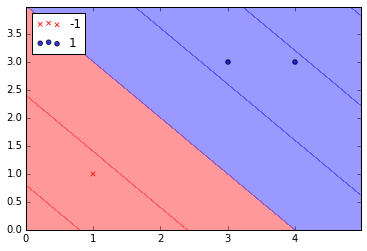

In [5]:
# 画决策面
plot_decsion_plane(X, clf.coef_, clf.intercept_)

In [6]:
# 验证线性支持向量机对偶形式的约束最小化问题等价于带有L2罚项的合页损失无约束最小化问题
learning_rate = 0.01
max_iter = 1000
C = 1
# 权值初始值
w = np.array([0, 0])
# 偏置初始值
b = 0

# 训练过程
iter_cnt = 0
for j in range(1, max_iter+1):
    # 计算误差向量
    ei_li = []
    for i in range(X.shape[0]):
        ei = 1 - y[i] * (np.dot(w, X[i, :]) + b)
        ei_li.append(ei)

    # 取出误差最大项
    max_e = max(ei_li)
    max_e_index = ei_li.index(max_e)

    # 最大误差项<=0 退出
    if max_e <= 0:
        break

    # 更新参数
    w = (1-learning_rate) * w + learning_rate * C * y[max_e_index] * X[max_e_index, :]
    b = b + learning_rate * C * y[max_e_index]
    
    iter_cnt += 1

print("iter ", iter_cnt)
print("w=", w)
print("b=", b)


iter  633
w= [ 0.50190251  0.50188436]
b= -2.01


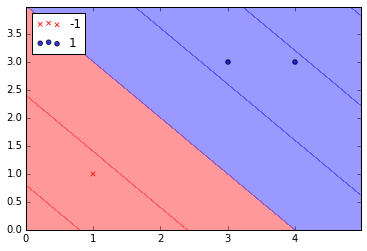

In [7]:
plot_decsion_plane(X, w, b)